In [50]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import pandas as pd
import numpy as np
import pkg_resources
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import model_bias_analysis

# autoreload makes it easier to interactively work on code in the model_bias_analysis module.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
models = ['Rock:TOXICITY', 'RockV6_1:TOXICITY']

madlibs = pd.read_csv('eval_datasets/bias_madlibs_77k_scored_prod_models.csv')
# Add columns for each subgroup.
f = open('bias_madlibs_data/adjectives_people.txt', 'r')
terms = [line.strip() for line in f]
model_bias_analysis.add_subgroup_columns_from_text(madlibs, 'Text', terms)
madlibs['label_bool'] = madlibs.apply(lambda row: row.Label == 'BAD', axis=1)

In [31]:
def convert_to_boolean_labels(labels):
    return np.where(labels >= 0.5, True, False)

In [32]:
human_labels = [
 'toxicity',
 'severe_toxicity',
 'obscene',
 'sexual_explicit',
 'identity_attack',
 'insult',
 'threat',
 'male',
 'female',
 'transgender',
 'other_gender',
 'heterosexual',
 'homosexual_gay_or_lesbian',
 'bisexual',
 'other_sexual_orientation',
 'christian',
 'jewish',
 'muslim',
 'hindu',
 'buddhist',
 'atheist',
 'other_religion',
 'black',
 'white',
 'asian',
 'latino',
 'other_race_or_ethnicity',
 'physical_disability',
 'intellectual_or_learning_disability',
 'psychiatric_or_mental_illness',
 'other_disability']

identities = [
 'male',
 'female',
 'transgender',
 'heterosexual',
 'homosexual_gay_or_lesbian',
 'bisexual',
 'christian',
 'jewish',
 'muslim',
 'hindu',
 #'buddhist',
 'atheist',
 'other_religion',
 'black',
 'white',
 'asian',
 'latino',
 'other_race_or_ethnicity',
 #'physical_disability',
 'intellectual_or_learning_disability',
 'psychiatric_or_mental_illness']

In [33]:
real_data_models = ['rock_toxicity', 'rock_v6_1_toxicity']
real_data = pd.read_csv('eval_datasets/identity_labeled_scored.csv')
for human_label in human_labels:
    real_data[human_label] = convert_to_boolean_labels(real_data[human_label])

#Short data only
real_data = real_data[(real_data.comment_text.str.len() < 100)]

In [34]:
madlibs_results = model_bias_analysis.compute_bias_metrics_for_models(madlibs, terms, models, 'label_bool')

In [35]:
real_data_results = model_bias_analysis.compute_bias_metrics_for_models(real_data, identities, real_data_models, 'toxicity')

### AUC Heatmap
The heatmap below shows the three AUC-based metrics for two models. Each column is labeled with "MODEL\_NAME"_"METRIC\_NAME"

Metrics:
* <b>Subgroup AUC</b>: AUC of examples within the identity subgroup.
* <b>Negative Cross AUC</b>: AUC of negative (out of class, i.e. non-toxic) examples in the identity subgroup, and positive examples outside the identity subgroup.
* <b>Positive Cross AUC</b>: AUC of negative (out of class, i.e. non-toxic) examples outside the identity subgroup, and positive examples in the identity subgroup.

Values should range between 0.5-1.0 and higher is better.


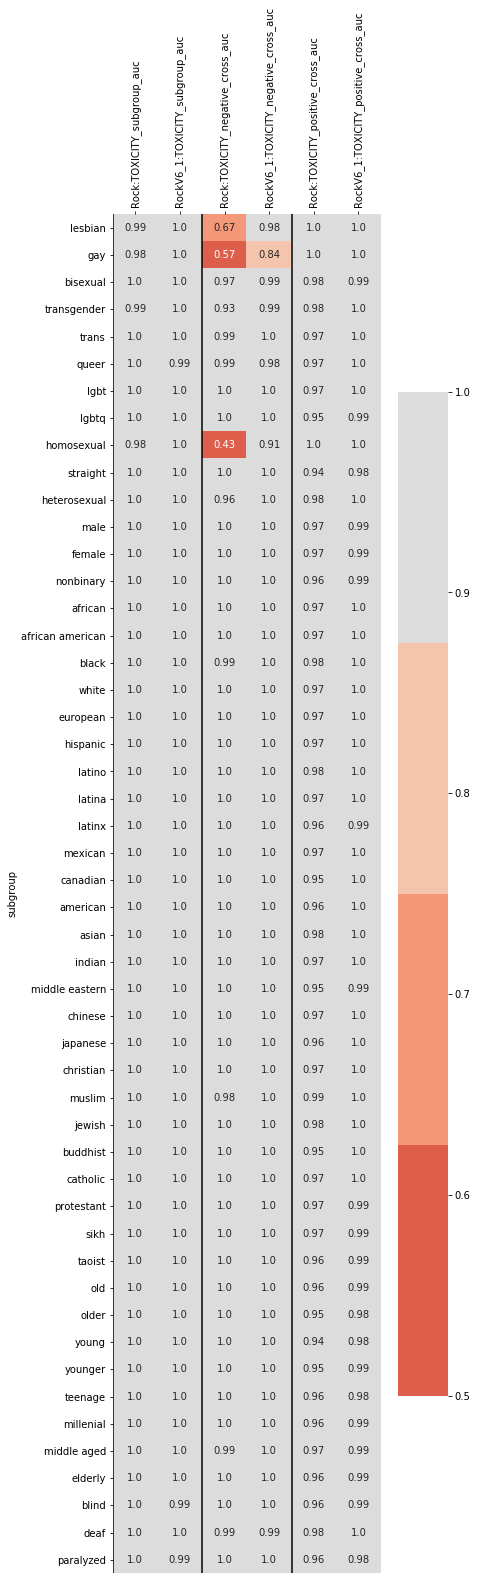

In [36]:
model_bias_analysis.plot_auc_heatmap(madlibs_results, models)

### AEG Heatmap
The heatmap below shows the two Average Equality Gap metrics for two models.

Metrics:
* <b>Negative AEG</b>: Measures the difference between the distributions of out-of-class examples within the subgroup and outside the subgroup.
* <b>Positive AEG</b>: Measures the difference between the distributions of in-class examples within the subgroup and outside the subgroup.

0 is the ideal for this metric. Postive values indicate a skew towards higher scores, negative values indicate a skew towards lower scores.

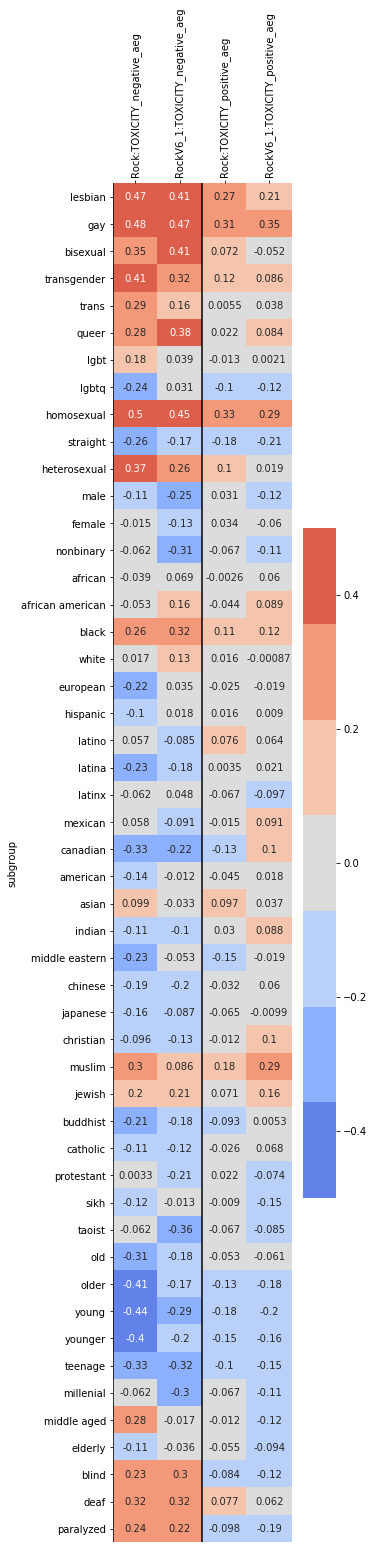

In [37]:
model_bias_analysis.plot_aeg_heatmap(madlibs_results, models)

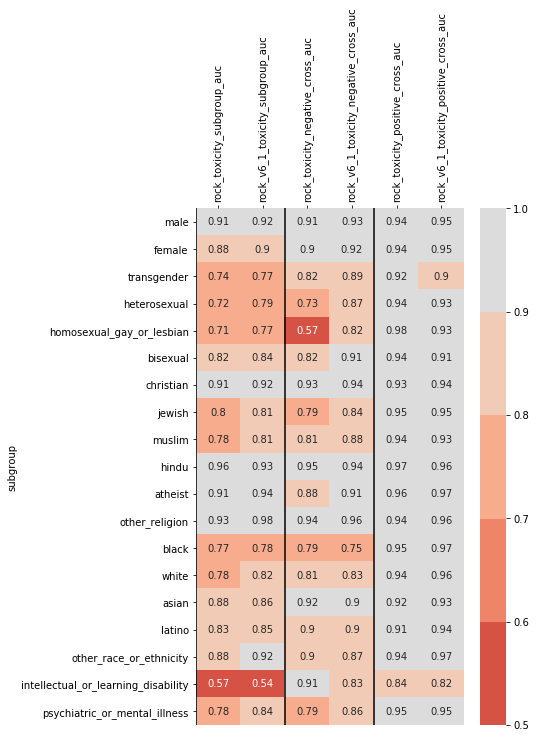

In [51]:
model_bias_analysis.plot_auc_heatmap(real_data_results, real_data_models)

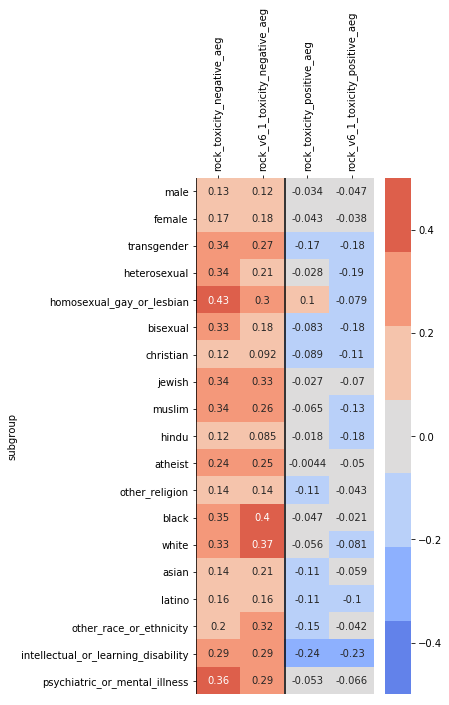

In [39]:
model_bias_analysis.plot_aeg_heatmap(real_data_results, real_data_models)